In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [20]:
case = "IEEE118_mod1"
nbc = 30

In [21]:
Folder_JB = 'J.Full_year_operational_cost/Results/B.Operation_cost'
Folder_JD = 'J.Full_year_operational_cost/Results/D.Representative_days_based_on_RES_and_Demand'
Folder_JE = 'J.Full_year_operational_cost/Results/E.Representative_days_based_on_Line_Benefits_OptModel'
Folder_JK = 'J.Full_year_operational_cost/Results/K.Investments_per_hour'
Folder_JL = 'J.Full_year_operational_cost/Results/L.Cont_Investments_per_hour'

# Folder_JB = 'J.Full_year_operational_cost/Results/B'
# Folder_JD = 'J.Full_year_operational_cost/Results/D'
# Folder_JE = 'J.Full_year_operational_cost/Results/E'
# Folder_JK = 'J.Full_year_operational_cost/Results/K'
# Folder_JL = 'J.Full_year_operational_cost/Results/L'

Folder_B = "B.Operation_cost"
DirName  = os.getcwd()
category_dict = {
                 Folder_B: "OPC",
                 Folder_JB: "OPC_fy",
                 Folder_JD: "R&D_fy",
                 Folder_JE: "OPT_LB_fy",
                 Folder_JK: "HI_fy",
                 Folder_JL: "CHI_fy"
                }

In [22]:
def LoadingData(dir, folder,result, case, ncluster, cm):
    if folder == 'A.The_full_year_MILP': 
        df = pd.read_csv(os.path.join( folder, case, '3.Out', f'oT_Result_{result}_'+case+'.csv'), index_col=[0,1])
    else: 
        #df = pd.read_csv(os.path.join( folder, case+'_ByStages_nc'+str(ncluster), '3.Out', f'oT_Result_{result}_'+case+ '_ByStages_nc'+str(ncluster)+'.csv'), index_col=[0,1])
        df = pd.read_csv(f"{folder}/{case}_Bystages_nc{ncluster}/3.out/oT_Result_{result}_{case}_Bystages_nc{ncluster}.csv",index_col=[0,1])
    df['CaseName'] = folder + ' - ' + case + str(ncluster)
    df['Case'] = case
    df['Clustering method'] = cm
    df['Number of clusters'] = ncluster
    df = df.reset_index()
    if result == "CostSummary":
        df["Cost/Payment"] = df["Cost/Payment"].str.replace(" ","")
    print(f"{folder}/{case}_Bystages_nc{ncluster}/3.out/oT_Result_{result}_{case}_Bystages_nc{ncluster}.csv")
    return df

In [23]:
df_all = pd.DataFrame()

folders = [Folder_JB,Folder_JD,Folder_JE,Folder_JK,Folder_JL]
for folder in folders: 
    df = LoadingData(DirName,folder,"CostSummary",case,nbc,category_dict[folder])
    df_all = pd.concat([df_all,df])

df_cost_bm = pd.read_csv(f"J.Full_year_operational_cost/Results/L.Cont_Investments_per_hour/IEEE118_mod1_ByStages_nc400/3.Out/oT_Result_CostSummary_IEEE118_mod1_ByStages_nc400.csv")

#df_cost_bm = pd.read_csv(f"A.The_full_year_MILP/RTS24_mod1/3.Out/oT_Result_CostSummary_RTS24_mod1.csv")


df_cost_bm['CaseName'] = "Benchmark"
df_cost_bm['Case'] = case
df_cost_bm['Clustering method'] = "Benchmark"
df_cost_bm['Number of clusters'] = 400
df_cost_bm["Cost/Payment"] = df["Cost/Payment"].str.replace(" ","")
df_all = pd.concat([df_all,df_cost_bm])
#df_all.pivot_table(index = "Clustering method",columns = "Cost/Payment",values = "MEUR")

J.Full_year_operational_cost/Results/B.Operation_cost/IEEE118_mod1_Bystages_nc30/3.out/oT_Result_CostSummary_IEEE118_mod1_Bystages_nc30.csv
J.Full_year_operational_cost/Results/D.Representative_days_based_on_RES_and_Demand/IEEE118_mod1_Bystages_nc30/3.out/oT_Result_CostSummary_IEEE118_mod1_Bystages_nc30.csv
J.Full_year_operational_cost/Results/E.Representative_days_based_on_Line_Benefits_OptModel/IEEE118_mod1_Bystages_nc30/3.out/oT_Result_CostSummary_IEEE118_mod1_Bystages_nc30.csv
J.Full_year_operational_cost/Results/K.Investments_per_hour/IEEE118_mod1_Bystages_nc30/3.out/oT_Result_CostSummary_IEEE118_mod1_Bystages_nc30.csv
J.Full_year_operational_cost/Results/L.Cont_Investments_per_hour/IEEE118_mod1_Bystages_nc30/3.out/oT_Result_CostSummary_IEEE118_mod1_Bystages_nc30.csv


In [24]:
df_cost_bm

,Period,Cost/Payment,MEUR,CaseName,Case,Clustering method,Number of clusters
0,,TotalSystemCost,1310.340627,Benchmark,IEEE118_mod1,Benchmark,400
1,2030,GenerationInvestmentCost,0.000000,Benchmark,IEEE118_mod1,Benchmark,400
2,2030,NetworkInvestmentCost,223.700806,Benchmark,IEEE118_mod1,Benchmark,400
3,2030,GenerationOperationCost,650.462491,Benchmark,IEEE118_mod1,Benchmark,400
4,2030,ConsumptionOperationCost,0.000000,Benchmark,IEEE118_mod1,Benchmark,400
5,2030,EmissionCost,435.550582,Benchmark,IEEE118_mod1,Benchmark,400
6,2030,ReliabilityCost,0.626747,Benchmark,IEEE118_mod1,Benchmark,400


In [25]:
df_pivot = df_all.pivot_table(index = "Clustering method",columns = "Cost/Payment",values = "MEUR").drop("TotalSystemCost",axis = 1)
df_pivot_sys_cost = df_all.pivot_table(index = "Clustering method",columns = "Cost/Payment",values = "MEUR")["TotalSystemCost"]

In [26]:
(df_pivot_sys_cost/df_pivot_sys_cost.loc["Benchmark"]-1)*100

Clustering method
Benchmark    0.000000e+00
CHI_fy       4.046182e+00
HI_fy        9.037153e-01
OPC_fy      -2.220446e-14
OPT_LB_fy    5.308066e+00
R&D_fy       4.440892e-14
Name: TotalSystemCost, dtype: float64

<Axes: xlabel='Clustering method'>

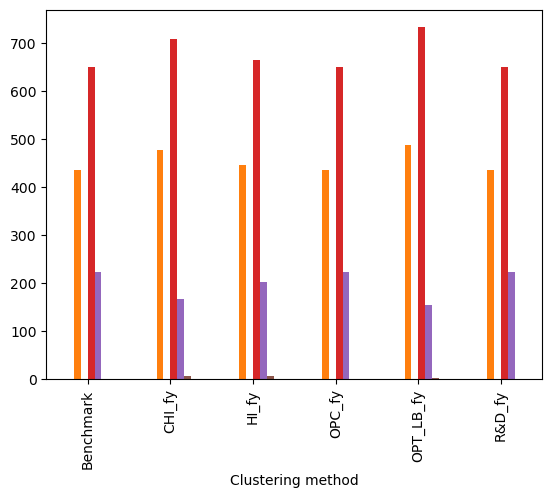

In [27]:
df_pivot.plot(kind = "bar",stacked = False,legend = False)

In [224]:
df_all_inv = pd.DataFrame()

folders = [Folder_JB,Folder_JD,Folder_JE,Folder_JK,Folder_JL]
#folders = [Folder_B,Folder_JB,Folder_JD]

for folder in folders: 
    df = LoadingData(DirName,folder,"NetworkInvestment",case,nbc,category_dict[folder])
    df_all_inv = pd.concat([df_all_inv,df])


J.Full_year_operational_cost/Results/B.Operation_cost/IEEE118_mod2_Bystages_nc20/3.out/oT_Result_NetworkInvestment_IEEE118_mod2_Bystages_nc20.csv
J.Full_year_operational_cost/Results/D.Representative_days_based_on_RES_and_Demand/IEEE118_mod2_Bystages_nc20/3.out/oT_Result_NetworkInvestment_IEEE118_mod2_Bystages_nc20.csv
J.Full_year_operational_cost/Results/E.Representative_days_based_on_Line_Benefits_OptModel/IEEE118_mod2_Bystages_nc20/3.out/oT_Result_NetworkInvestment_IEEE118_mod2_Bystages_nc20.csv
J.Full_year_operational_cost/Results/K.Investments_per_hour/IEEE118_mod2_Bystages_nc20/3.out/oT_Result_NetworkInvestment_IEEE118_mod2_Bystages_nc20.csv
J.Full_year_operational_cost/Results/L.Cont_Investments_per_hour/IEEE118_mod2_Bystages_nc20/3.out/oT_Result_NetworkInvestment_IEEE118_mod2_Bystages_nc20.csv


<Axes: xlabel='Nodes'>

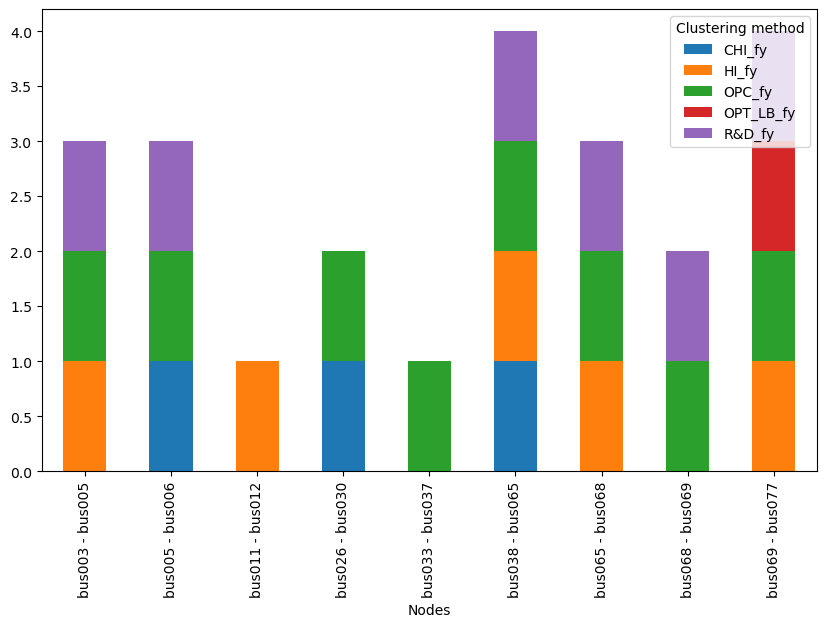

In [225]:
# Combine 'InitialNode' and 'FinalNode' into a single column
df_all_inv['Nodes'] = df_all_inv['InitialNode'].astype(str) + " - " + df_all_inv['FinalNode'].astype(str)

# Pivot the DataFrame to reshape it for stacking
#Filter out lines with no investment
df_all_inv_f = df_all_inv["p.u."] == 1

#Pivot 
df_pivot = df_all_inv[df_all_inv_f].pivot_table(index='Nodes', columns='Clustering method', values='p.u.', aggfunc='sum')
#df_pivot = df_all_inv.pivot_table(index='Clustering method', columns='Nodes', values='p.u.', aggfunc='sum')

#Filter out lines where all of them invest in 
df_pivot  = df_pivot[~(df_pivot == 1).all(axis=1)]


# Plot stacked bar chart
df_pivot.plot(kind='bar', stacked=True, figsize=(10, 6))


In [10]:
# sum(LoadingData(DirName,folder,"NetworkInvestment",case,nbc,category_dict[Folder_JB])["p.u."]),
sum(LoadingData(DirName,Folder_JL,"NetworkInvestment",case,nbc,category_dict[Folder_JL])["p.u."])

J.Full_year_operational_cost/Results/L.Cont_Investments_per_hour/IEEE118_mod1_Bystages_nc20/3.out/oT_Result_NetworkInvestment_IEEE118_mod1_Bystages_nc20.csv


15.0

In [11]:
#pd.read_csv('J.Full_year_operational_cost/Results/E.Representative_days_based_on_Line_Benefits_OptModel/IEEE118_mod1_Bystages_nc20/3.out/oT_Result_NetworkInvestment_IEEE118_mod1_Bystages_nc20.csv')
pd.read_csv('J.Full_year_operational_cost/Results/E.Representative_days_based_on_Line_Benefits_OptModel/IEEE118_mod1_ByStages_nc20/3.Out/oT_Result_NetworkInvestment_IEEE118_mod1_ByStages_nc20.csv')

,Period,InitialNode,FinalNode,Circuit,p.u.
0,2030,bus008,bus030,cac1,1.0
1,2030,bus033,bus037,cac1,0.0
2,2030,bus012,bus014,cac1,-0.0
3,2030,bus094,bus100,cac1,1.0
4,2030,bus004,bus011,cac1,-0.0
5,2030,bus069,bus077,cac1,1.0
6,2030,bus026,bus030,cac1,-0.0
7,2030,bus008,bus005,cac1,1.0
8,2030,bus093,bus094,cac1,1.0
9,2030,bus054,bus056,cac1,-0.0


In [12]:
#pd.read_csv("J.Full_year_operational_cost/Results/E.Representative_days_based_on_Line_Benefits_OptModel/IEEE118_mod1_Bystages_nc20/3.out/oT_Result_NetworkInvestment_IEEE118_mod1_Bystages_nc20.csv")
pd.read_csv("J.Full_year_operational_cost/Results/E.Representative_days_based_on_Line_Benefits_OptModel/IEEE118_mod1_ByStages_nc20/3.Out/oT_Result_NetworkInvestment_IEEE118_mod1_ByStages_nc20.csv")

,Period,InitialNode,FinalNode,Circuit,p.u.
0,2030,bus008,bus030,cac1,1.0
1,2030,bus033,bus037,cac1,0.0
2,2030,bus012,bus014,cac1,-0.0
3,2030,bus094,bus100,cac1,1.0
4,2030,bus004,bus011,cac1,-0.0
5,2030,bus069,bus077,cac1,1.0
6,2030,bus026,bus030,cac1,-0.0
7,2030,bus008,bus005,cac1,1.0
8,2030,bus093,bus094,cac1,1.0
9,2030,bus054,bus056,cac1,-0.0
